In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the new sets
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

print("\nValidation set shape:", x_val.shape)
print("Validation set shape:", y_val.shape)

print("\nTest set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Training set shape: (48000, 28, 28)
Training labels shape: (48000,)

Validation set shape: (12000, 28, 28)
Validation set shape: (12000,)

Test set shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
# #Normalize the data

x_train = (x_train - 0.2860) / 0.3530
x_val = (x_val - 0.2860) / 0.3530
x_test = (x_test - 0.2860) / 0.3530


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train[0].shape

(28, 28, 1)

In [ ]:
!pip install scikeras[tensorflow]

# Use Grid Search to find the best Filter and Kernel Sizes and then use them to produce a Training & Validation plot using the restored weights produced by the parameter values with the highest accuracy

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best Validation Accuracy: 0.8619
Best Hyperparameters:  {'model__filters_1': 32, 'model__filters_2': 64, 'model__kernel_size': (5, 5), 'model__learning_rate': 0.001}
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1384 - loss: 4.0250 - val_accuracy: 0.3162 - val_loss: 1.7621
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2690 - loss: 1.8182 - val_accuracy: 0.6104 - val_loss: 1.0303
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5377 - loss: 1.1840 - val_accuracy: 0.7248 - val_loss: 0.6730
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6599 - loss: 0.8334 - val_accuracy: 0.7640 - val_loss: 0.5717
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7231 - loss: 0.7015 - val_accuracy: 0.7995 - val_loss: 0.5226
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7571 - loss: 0.6167 - val_accuracy: 0.8182 - val_loss: 

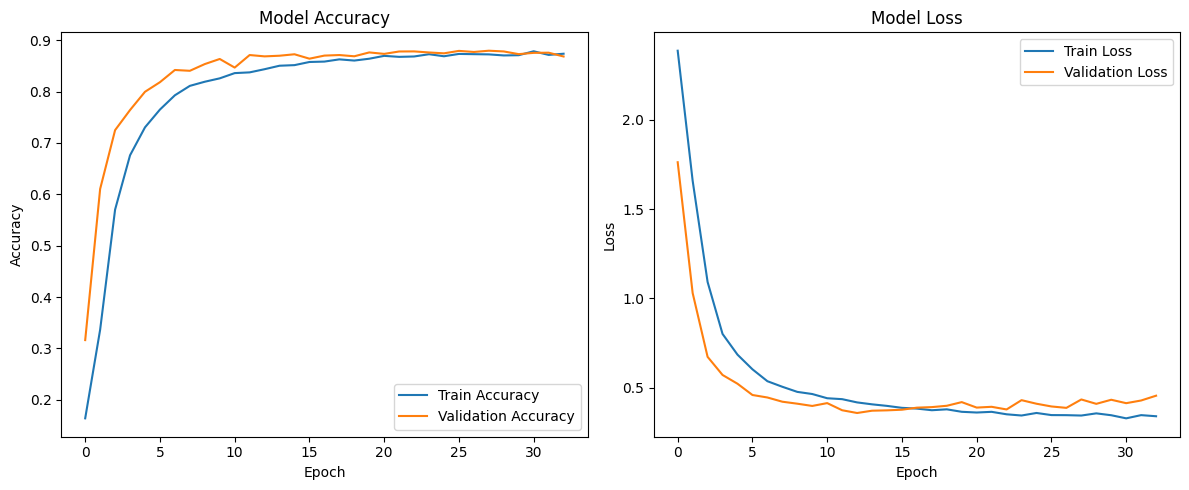

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import layers, models
from scikeras.wrappers import KerasClassifier  # Updated import for SciKeras
import tensorflow as tf

# Define the function to create the CNN model
def create_cnn(filters_1=32, filters_2=64, kernel_size=(3, 3), learning_rate=0.001):
    inputs = layers.Input(shape=(28, 28, 1))  # Input layer

    x = layers.Conv2D(filters=filters_1, kernel_size=kernel_size, activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(filters=filters_2, kernel_size=kernel_size, activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)  # Add dropout layer
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)  # Create a Model instance

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create a KerasClassifier wrapper for the model
model = KerasClassifier(model=create_cnn, epochs=10, batch_size=32, verbose=0)

# Define a grid of hyperparameters to search
param_grid = {
    'model__filters_1': [32, 64],         # Number of filters in the first convolutional layer
    'model__filters_2': [64, 128],        # Number of filters in the second convolutional layer
    'model__kernel_size': [(3, 3), (5, 5)], # Kernel sizes for convolutional layers
    'model__learning_rate': [0.001, 0.0001] # Learning rates
}

# Create a GridSearchCV object with adjusted parameters
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring='accuracy',   # Use accuracy as the scoring metric
                    cv=2,                 # Use fewer folds for faster execution
                    n_jobs=-1,           # Use all available cores
                    verbose=1)           # Increase verbosity

# Fit the grid search to the data (x_train and y_train should be defined)
grid_result = grid.fit(x_train, y_train)

# Summarize results and extract best hyperparameters based on validation accuracy
best_params = grid_result.best_params_
best_accuracy = grid_result.best_score_

print("Best Validation Accuracy: {:.4f}".format(best_accuracy))
print("Best Hyperparameters: ", best_params)

# Fit the best model on the training data with EarlyStopping to restore best weights
best_model = create_cnn(
    filters_1=best_params['model__filters_1'],
    filters_2=best_params['model__filters_2'],
    kernel_size=best_params['model__kernel_size'],
    learning_rate=best_params['model__learning_rate']
)

# Define EarlyStopping callback to restore best weights based on validation accuracy
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',   # Monitor validation accuracy
    patience=5,               # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from epoch with best validation accuracy
)

# Fit the best model on the training data and store history
history = best_model.fit(x_train, y_train,
                          validation_data=(x_val, y_val),
                          epochs=50,
                          batch_size=32,
                          verbose=1,
                          callbacks=[early_stopping])  # Include early stopping

# Plotting training and validation accuracy and loss curves
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()